# **F**lux **S**canning based on **E**nforced **O**bjective **F**lux

The Flux Scanning based on Enforced Objective Flux (FSEOF) tool from Cameo can be used to predict gene targets for up- and donwregulation to improve the metabolic flux towards a product.

In [1]:
# Load dependencies
import numpy as np
from matplotlib import pyplot as plt
from cobra.io import read_sbml_model
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
# Load model
model = read_sbml_model('../models/Adjusted_models/iMT1026-v3_MalonicAcid.xml')

# Change substrate
medium = model.medium
medium['Ex_glyc'] = 0
medium['Ex_meoh'] = 10
model.medium = medium

# Define functions
plotter = PlotlyPlotter()
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.MSADH)
df = result.data_frame

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-13


In [3]:
# Run the algorithm
fseof.run(target=model.reactions.MSADH)

,1,2,3,4,5,6,7,8,9,10
FACOAE140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003
PHEPYRAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017321,0.002229
CERASE118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000026
GLCCERS16d8,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000
GLCCERS16m9,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000
...,...,...,...,...,...,...,...,...,...,...
FA181tpc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000215
FA182tpc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000192
FA183tpc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000152
mac_etoEX,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000


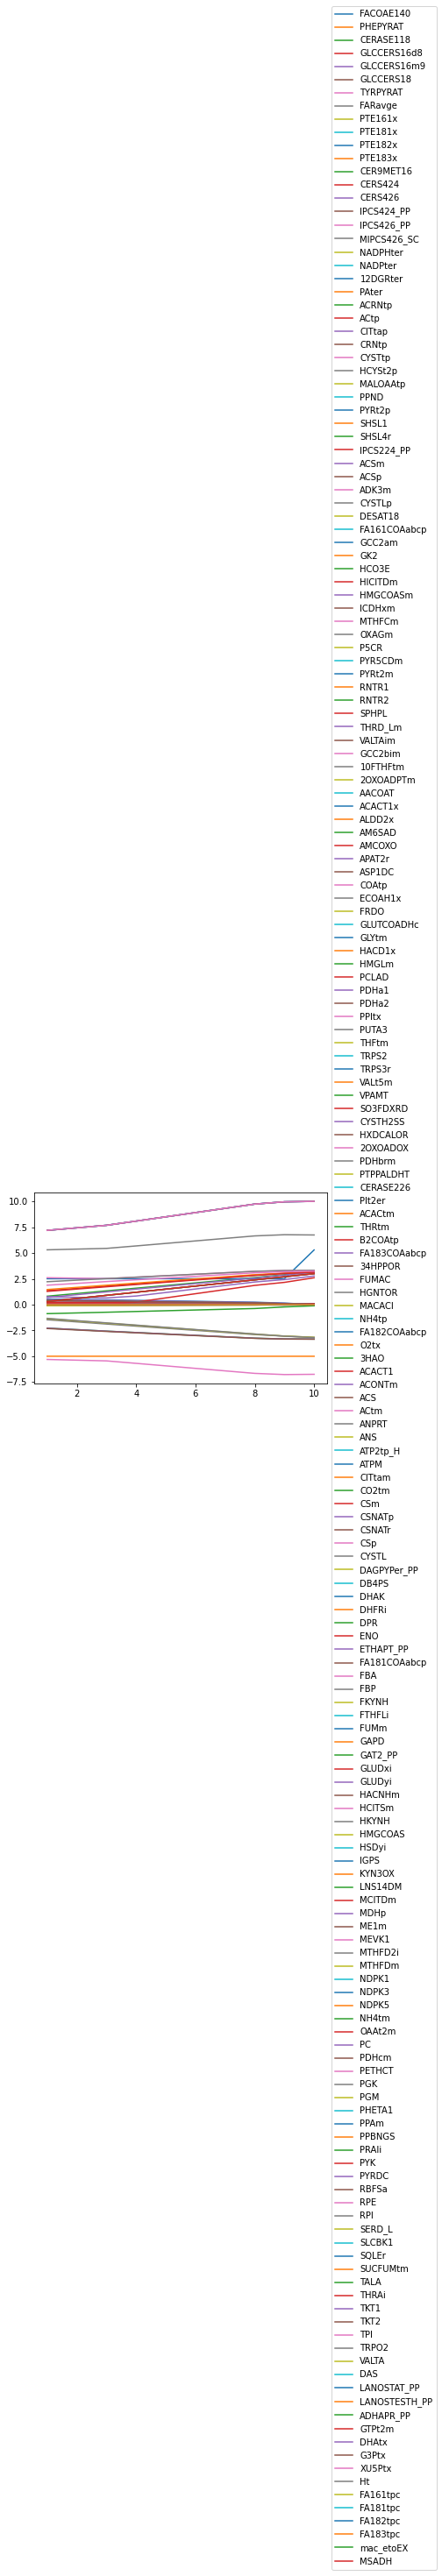

In [4]:
# Plot the resulting fluxes
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [5]:
# This was a work in progress, might not use it

# highs = (df > -0.001).all(axis=1)
# df = df.loc[highs]
# lows = (df < 0.001).all(axis=1)
# df.loc[lows]

In [6]:
# Table with ordered negative flux reactions
df = df.sort_values([10], ascending = True)
df[:15]

,1,2,3,4,5,6,7,8,9,10
FBA,-5.307416,-5.376897,-5.446377,-5.685259,-5.927842,-6.170424,-6.413007,-6.655590,-6.770485,-6.746076
O2tx,-4.996188,-4.996487,-4.996785,-4.997101,-4.997416,-4.997731,-4.998047,-4.998362,-4.998690,-4.999286
TKT2,-2.310695,-2.453181,-2.595668,-2.729461,-2.863065,-2.996668,-3.130272,-3.263875,-3.334096,-3.349318
TKT1,-2.273513,-2.418912,-2.564311,-2.701178,-2.837859,-2.974539,-3.111220,-3.247900,-3.321314,-3.334010
TALA,-2.273513,-2.418912,-2.564311,-2.701178,-2.837859,-2.974539,-3.111220,-3.247900,-3.321314,-3.334010
Ht,-1.328777,-1.548184,-1.767592,-1.982552,-2.197415,-2.412278,-2.627141,-2.842004,-3.053673,-3.192849
PGM,-1.358158,-1.575264,-1.792370,-2.004902,-2.217333,-2.429764,-2.642196,-2.854627,-3.042454,-3.166400
PGK,-1.462356,-1.671300,-1.880243,-2.084161,-2.287970,-2.491778,-2.695586,-2.899395,-3.042454,-3.166400
CO2tm,-0.871702,-0.803414,-0.735127,-0.663071,-0.590933,-0.518795,-0.446656,-0.374518,-0.222943,-0.111965
HMGCOASm,-0.010816,-0.009969,-0.009121,-0.008227,-0.007332,-0.006437,-0.005542,-0.004647,-0.003718,-0.060751


In [7]:
# Table with ordered positive flux reactions
df = df.sort_values([10], ascending = False)
df[:15]

,1,2,3,4,5,6,7,8,9,10
DHAtx,7.192199,7.437531,7.682863,8.090744,8.502177,8.913610,9.325043,9.736476,9.958161,10.000000
DAS,7.192199,7.437531,7.682863,8.090744,8.502177,8.913610,9.325043,9.736476,9.958161,10.000000
DHAK,7.192199,7.437531,7.682863,8.090744,8.502177,8.913610,9.325043,9.736476,9.958161,10.000000
XU5Ptx,7.192199,7.437531,7.682863,8.090744,8.502177,8.913610,9.325043,9.736476,9.958161,10.000000
G3Ptx,7.192199,7.437531,7.682863,8.090744,8.502177,8.913610,9.325043,9.736476,9.958161,10.000000
FBP,5.307416,5.376897,5.446377,5.685259,5.927842,6.170424,6.413007,6.655590,6.770485,6.746076
ATPM,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,2.510000,5.296625
RPE,2.607992,2.565438,2.522884,2.660105,2.801254,2.942403,3.083552,3.224701,3.302751,3.316673
RPI,2.219517,2.369146,2.518775,2.660106,2.801255,2.942404,3.083553,3.224701,3.302751,3.316673
TPI,1.882213,2.058265,2.234318,2.403531,2.572593,2.741656,2.910719,3.079782,3.186792,3.253443


Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

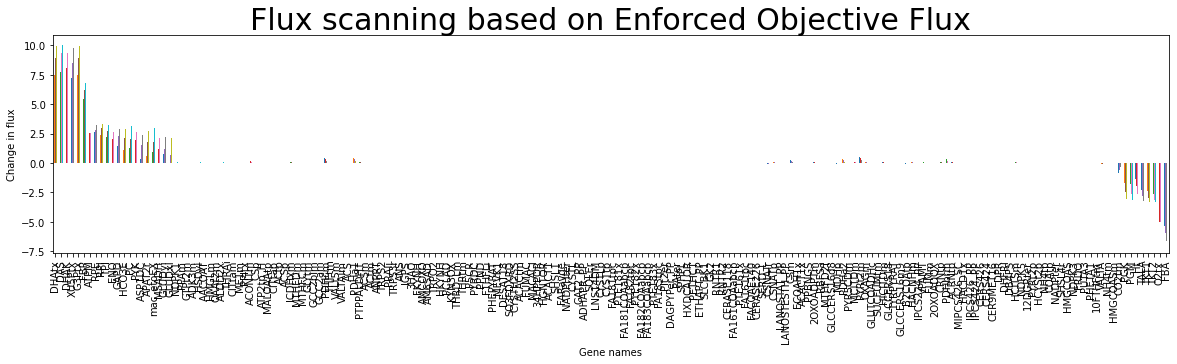

In [8]:
# Table depicting overall fluxes, will update or remove this as it is not very informative as is.
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [9]:
df['relative_change_in_flux'] = abs(df[10]-df[1])/abs(df[10]) +1

In [10]:
# Table with reactions that have a < 80% change in flux, excluding Inf due to absolute 0 fluxes.
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]
target_reactions_df = target_reactions_df.sort_values(['relative_change_in_flux'], ascending = False)
target_reactions_df = target_reactions_df[target_reactions_df['relative_change_in_flux'] != np.Inf]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
COAtp,-0.044336,-0.040863,-0.037390,-0.033725,-0.030056,-0.026387,-0.022718,-0.019049,0.000000,-0.000583,76.048027
PDHa1,0.491729,0.453208,0.414687,0.374040,0.333347,0.292653,0.251960,0.211266,0.127703,0.018847,26.090571
PDHcm,0.392805,0.362033,0.331262,0.298792,0.266285,0.233778,0.201272,0.168765,0.093139,0.024712,15.895314
ACONTm,0.229995,0.211977,0.193960,0.174949,0.155915,0.136882,0.117848,0.098815,0.063826,0.027587,8.337079
CO2tm,-0.871702,-0.803414,-0.735127,-0.663071,-0.590933,-0.518795,-0.446656,-0.374518,-0.222943,-0.111965,7.785487
...,...,...,...,...,...,...,...,...,...,...,...
APAT2r,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000,1.900000
MSADH,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000,1.900000
mac_etoEX,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000,1.900000
ASP1DC,0.300009,0.600008,0.900008,1.200007,1.500006,1.800005,2.100004,2.400004,2.700003,3.000001,1.899997


In [11]:
# Table with reactions that have a < 80% change in flux, ordered based on absolute change in flux
target_reactions_df2 = target_reactions_df
target_reactions_df2['absolute_change'] = abs(target_reactions_df[1] - target_reactions_df[10])
target_reactions_df2 = target_reactions_df2.sort_values(['absolute_change'], ascending = False)
target_reactions_df2[:30]

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux,absolute_change
mac_etoEX,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000,1.900000,2.700000
APAT2r,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000,1.900000,2.700000
MSADH,0.300000,0.600000,0.900000,1.200000,1.500000,1.800000,2.100000,2.400000,2.700000,3.000000,1.900000,2.700000
ASP1DC,0.300009,0.600008,0.900008,1.200007,1.500006,1.800005,2.100004,2.400004,2.700003,3.000001,1.899997,2.699992
GLUDxi,0.000000,0.000000,0.000000,0.250774,0.654044,1.057314,1.460585,1.863855,2.156989,2.602287,2.000000,2.602287
CO2tm,-0.871702,-0.803414,-0.735127,-0.663071,-0.590933,-0.518795,-0.446656,-0.374518,-0.222943,-0.111965,7.785487,0.759737
PDHa1,0.491729,0.453208,0.414687,0.374040,0.333347,0.292653,0.251960,0.211266,0.127703,0.018847,26.090571,0.472882
PDHcm,0.392805,0.362033,0.331262,0.298792,0.266285,0.233778,0.201272,0.168765,0.093139,0.024712,15.895314,0.368093
ACONTm,0.229995,0.211977,0.193960,0.174949,0.155915,0.136882,0.117848,0.098815,0.063826,0.027587,8.337079,0.202408
ICDHxm,0.122559,0.112958,0.103357,0.093444,0.083278,0.073112,0.062946,0.052779,0.063826,0.027587,4.442636,0.094972


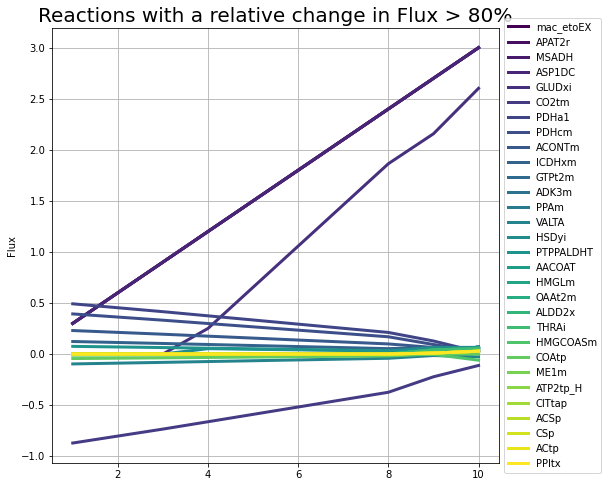

In [12]:
df = target_reactions_df2[:30].drop(['relative_change_in_flux', 'absolute_change'], axis = 1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)
plt.legend(loc='center left', bbox_to_anchor = (1, 0.5))